<a href="https://colab.research.google.com/github/tijanavukovic1/Realistic-Image-Generation/blob/master/klasifikacija.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
%cd gdrive/My Drive/PSIML PROJEKAT/data-efficient-gans-master/DiffAugment-biggan-cifar

/content/gdrive/My Drive/PSIML PROJEKAT/data-efficient-gans-master/DiffAugment-biggan-cifar


In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

In [ ]:
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [ ]:
# Loading training data
train_data = torchvision.datasets.ImageFolder(root='data/baza_200+4000vestackih', transform=transform)

train_loader = torch.utils.data.DataLoader(train_data, batch_size=5, shuffle=True, num_workers=4)

# Loading validation data
validation_data = torchvision.datasets.ImageFolder(root='data/val', transform=transform)

validation_loader = torch.utils.data.DataLoader(validation_data, batch_size=20, shuffle=False, num_workers=4)

# Loading test data 

test_data = torchvision.datasets.ImageFolder(root='data/test', transform=transform)

test_loader = torch.utils.data.DataLoader(test_data, batch_size=20
                                          , shuffle=False, num_workers=4)

#Class labels

classes = ('cat','dog','wild')


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


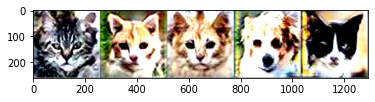

  cat   cat   cat


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#Function to show some random images
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

#Get some random training images
dataiter = iter(train_loader)
images, labels = dataiter.next()

#Show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(3)))

In [ ]:
#Now using the AlexNet
AlexNet_model = torch.hub.load('pytorch/vision:v0.6.0', 'alexnet', pretrained=False)

#Model description
AlexNet_model.eval()


Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.6.0


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:
#Updating the second classifier
import torch
import torch.nn as nn
AlexNet_model.classifier[4] = nn.Linear(4096,1024)

#Updating the third and the last classifier that is the output layer of the network. Make sure to have 10 output nodes if we are going to get 10 class labels through our model.
AlexNet_model.classifier[6] = nn.Linear(1024,3)

In [ ]:
AlexNet_model.eval()


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:
#Instantiating CUDA device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

#Verifying CUDA
print(device)

#Move the input and AlexNet_model to GPU for speed if available
AlexNet_model.to(device)


cuda:0


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:
import torch.optim as optim
import torch.nn as nn

#Loss
criterion = nn.CrossEntropyLoss()

#Optimizer(SGD)
optimizer = optim.SGD(AlexNet_model.parameters(), lr=0.001, momentum=0.9)

In [ ]:
Number_of_epochs=200
patience=5
previous_val_loss=0
for epoch in range(Number_of_epochs):  # loop over the dataset multiple times
    if patience==0:
      print('Early stopping')
      break
    
    running_loss = 0.0
    total=0
    for i, data in enumerate(train_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data[0].to(device), data[1].to(device)

        # zero the parameter gradients
        optimizer.zero_grad()
        total += labels.size(0)
        # forward + backward + optimize
        output = AlexNet_model(inputs)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
    print('Epoch: ',epoch,' Train loss:' ,running_loss/total)  
    correct = 0
    total = 0
    total_val_loss=0
    with torch.no_grad():
      for _,data in enumerate(validation_loader,0):
        images, labels = data[0].to(device),data[1].to(device)
        outputs = AlexNet_model(images)
        validation_loss=criterion(outputs, labels)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        total_val_loss+=validation_loss.item()
    print('Epoch: ',epoch,' Validation accuracy:',correct/total*100,' Validation_loss: ',total_val_loss/total)
    if  previous_val_loss<total_val_loss:
      patience-=1
    else:
      patience=5
    previous_val_loss=total_val_loss


print('Finished Training of AlexNet')

Epoch:  0  Train loss: 0.059528841301283615
Epoch:  0  Validation accuracy: 77.83333333333333  Validation_loss:  0.0304072409371535
Epoch:  1  Train loss: 0.006116762340848013
Epoch:  1  Validation accuracy: 81.66666666666667  Validation_loss:  0.029761904136588177
Epoch:  2  Train loss: 0.004301959398742228
Epoch:  2  Validation accuracy: 83.33333333333334  Validation_loss:  0.02211395851025979
Epoch:  3  Train loss: 0.0033277291856885056
Epoch:  3  Validation accuracy: 84.5  Validation_loss:  0.020749617318312326
Epoch:  4  Train loss: 0.0026942834810197796
Epoch:  4  Validation accuracy: 85.33333333333334  Validation_loss:  0.02120285869576037
Epoch:  5  Train loss: 0.001854057994044678
Epoch:  5  Validation accuracy: 86.5  Validation_loss:  0.023169738625486692
Epoch:  6  Train loss: 0.0018218976128959192
Epoch:  6  Validation accuracy: 86.0  Validation_loss:  0.01803691449264685
Epoch:  7  Train loss: 0.0015268081345730384
Epoch:  7  Validation accuracy: 86.66666666666667  Validat

In [ ]:
import sklearn
import sklearn.metrics
#Testing Accuracy
correct = 0
total = 0
predicted_array=np.array([])
label_array=np.array([])
with torch.no_grad():
    for data in test_loader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = AlexNet_model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        predicted_array=np.append(predicted_array,predicted.cpu().numpy())
        label_array=np.append(label_array,labels.cpu().numpy())


print('Accuracy of the network on the test images: %d %%' % (
    100 * correct / total))
sklearn.metrics.confusion_matrix(predicted_array, label_array)

Accuracy of the network on the test images: 87 %


array([[887,  62,  65],
       [ 72, 886,  96],
       [ 41,  52, 839]])

In [ ]:
import sklearn.metrics
sklearn.metrics.confusion_matrix(predicted_array, label_array)

array([[887,  62,  65],
       [ 72, 886,  96],
       [ 41,  52, 839]])

In [ ]:
#Testing classification accuracy for individual classes.
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in test_loader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = AlexNet_model(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(2):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(3):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of   cat : 87 %
Accuracy of   dog : 93 %
Accuracy of  wild : 84 %


In [ ]:
avg = 0
for i in range(3):
  temp = (100 * class_correct[i] / class_total[i])
  avg = avg + temp
avg = avg/3
print('Average accuracy = ', avg)


Average accuracy =  88.0
